In [2]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [142]:
df= pd.read_csv("delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [143]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [145]:
df=df.rename({'Delivery Time':'Del','Sorting Time':'Sort'},axis=1)
df

,Del,Sort
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


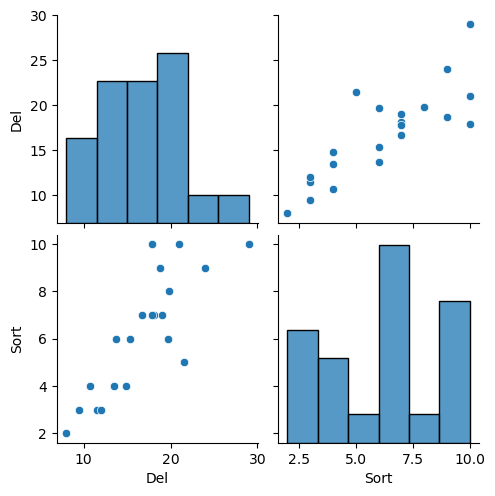

In [147]:
sns.pairplot(df)

<Axes: xlabel='Del', ylabel='Sort'>

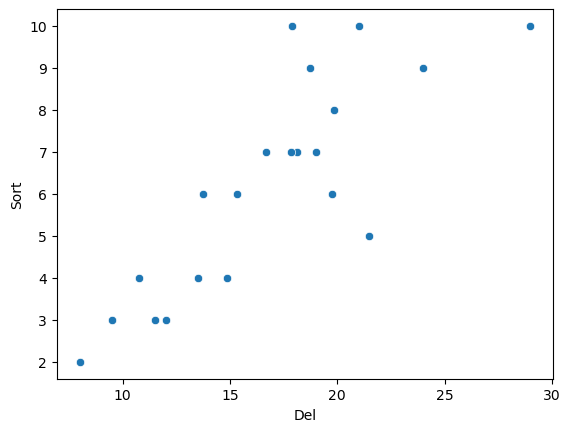

In [148]:
sns.scatterplot(x=df['Del'],y=df['Sort'])

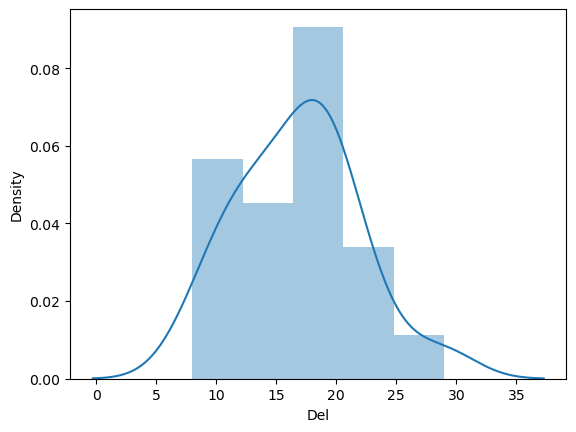

In [149]:
sns.distplot(df['Del']);

<Axes: xlabel='Sort', ylabel='Density'>

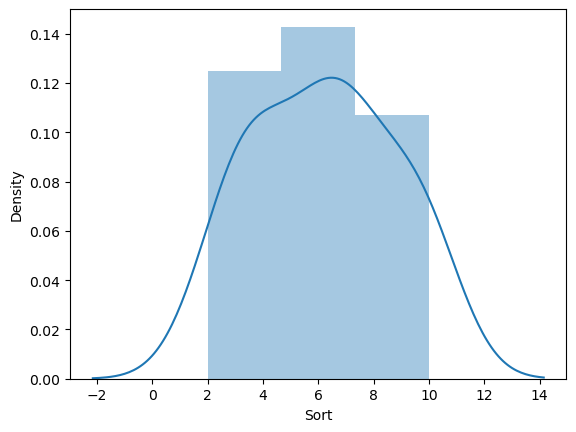

In [150]:
sns.distplot(df['Sort'])

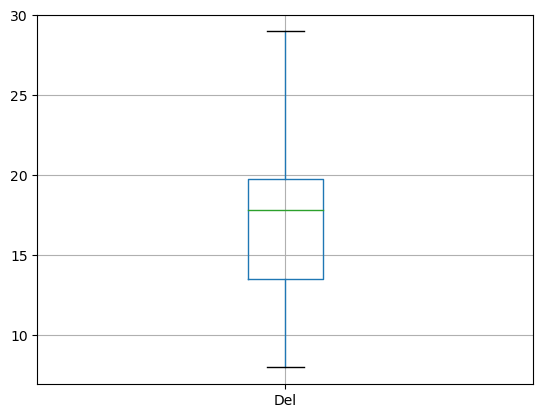

In [151]:
#Box plot
df.boxplot(column=['Del']);

<Axes: >

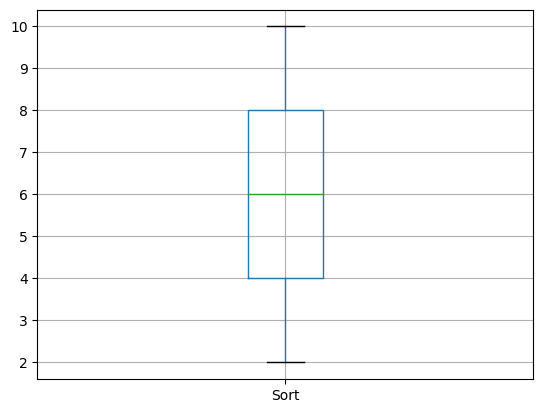

In [152]:
#Box plot
df.boxplot(column=['Sort'])

<Axes: >

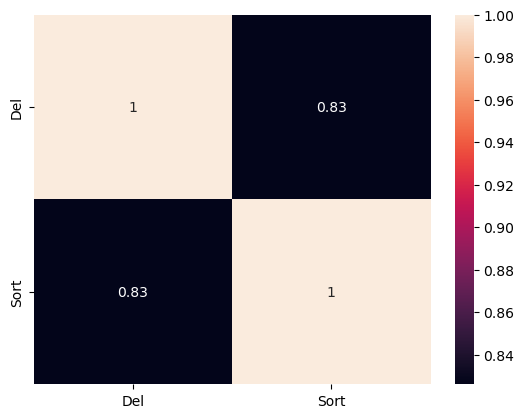

In [153]:
sns.heatmap(df.corr(),annot=True)

In [154]:

import statsmodels.formula.api as smf

In [155]:
# Model Building
model= smf.ols('Del~Sort', data=df).fit()
model

In [156]:
#Model parameters
model.params

Intercept    6.582734
Sort         1.649020
dtype: float64

In [157]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Del   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           3.98e-06
Time:                        14:43:04   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
Sort           1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
model.pvalues

Intercept    0.001147
Sort         0.000004
dtype: float64

In [159]:
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [160]:
model.conf_int(0.05)

,0,1
Intercept,2.979134,10.186334
Sort,1.108673,2.189367


In [161]:
from statsmodels.graphics.regressionplots import influence_plot

<Axes: xlabel='Sort', ylabel='Del'>

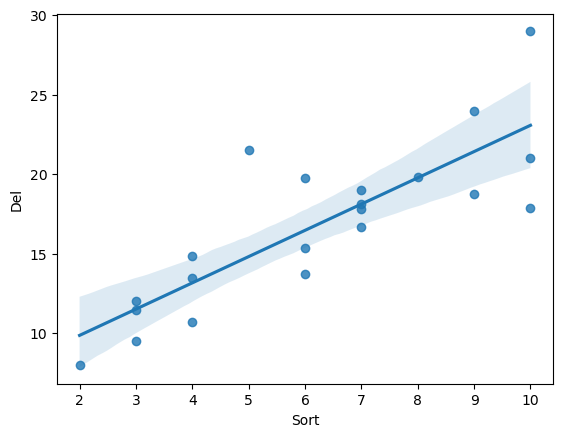

In [162]:
sns.regplot(x='Sort',y='Del',data=df)

In [163]:
model.params

Intercept    6.582734
Sort         1.649020
dtype: float64

In [164]:
print(model.tvalues, '\n', model.pvalues)

Intercept    3.823349
Sort         6.387447
dtype: float64 
 Intercept    0.001147
Sort         0.000004
dtype: float64


In [165]:
ml_influence=model.get_influence()
(m,_)=ml_influence.cooks_distance
m

array([5.65174628e-02, 6.05802657e-04, 3.28610455e-02, 5.27064095e-02,
       4.62053041e-01, 3.89480081e-03, 2.60419093e-03, 3.96028930e-02,
       3.51953954e-01, 5.67854347e-02, 1.49639848e-05, 3.46421730e-02,
       7.12499306e-03, 8.53239427e-06, 2.40503559e-03, 1.69949775e-02,
       2.28073073e-02, 8.58728156e-07, 5.65138719e-02, 2.98356431e-04,
       1.70820972e-01])

Text(0, 0.5, 'Cooks Distance')

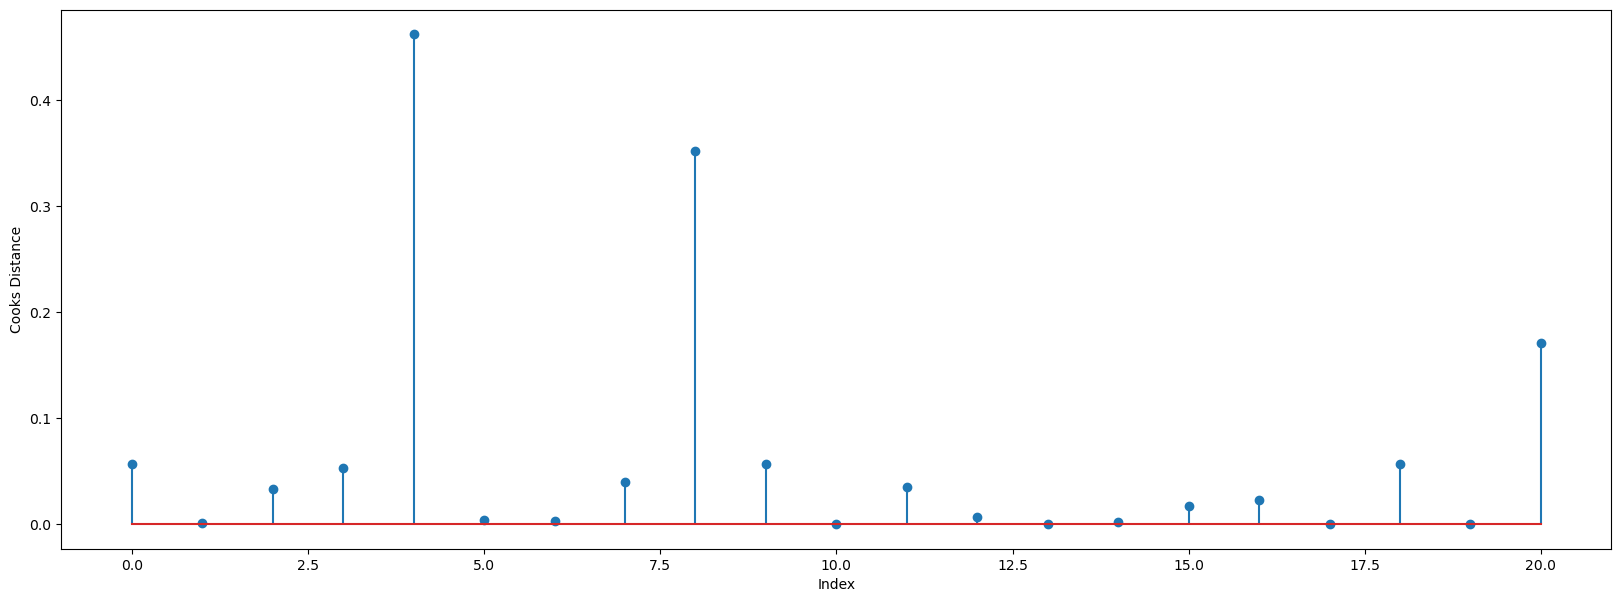

In [166]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(m,3))
plt.xlabel('Index')
plt.ylabel('Cooks Distance')

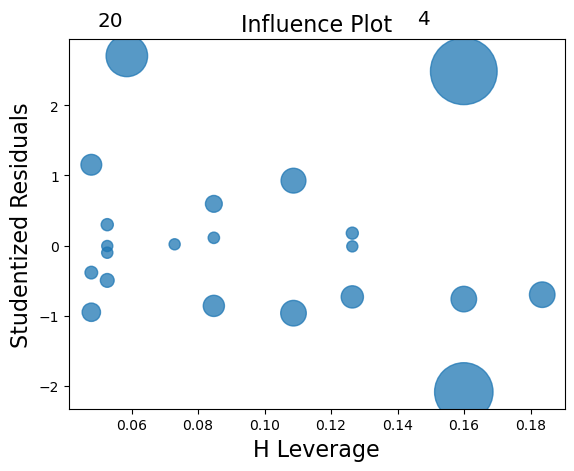

In [167]:
influence_plot(model)
plt.show()

In [168]:
np.argmax(m),np.max(m)

(4, 0.4620530412650319)

In [169]:
df1=df.drop(df.index[[4,8,20]],axis=0).reset_index()
df1

,index,Del,Sort
0,0,21.00,10
1,1,13.50,4
2,2,19.75,6
3,3,24.00,9
4,5,15.35,6
5,6,19.00,7
6,7,9.50,3
7,9,18.75,9
8,10,19.83,8
9,11,10.75,4


In [170]:
df1=df1.drop(['index'],axis=1)
df1

,Del,Sort
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,15.35,6
5,19.00,7
6,9.50,3
7,18.75,9
8,19.83,8
9,10.75,4


In [171]:
model1=smf.ols('Del~Sort',data=df1).fit()
model1

In [172]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Del   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     79.94
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           1.27e-07
Time:                        14:43:20   Log-Likelihood:                -35.450
No. Observations:                  18   AIC:                             74.90
Df Residuals:                      16   BIC:                             76.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0240      1.175      5.126      0.000       3.533       8.515
Sort           1.6741      0.187      8.941      0.000       1.277       2.071
==============================================================================
Omnibus:                        1.044   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.593   Jarque-Bera (JB):                0.959
Skew:                           0.447   Prob(JB):                        0.619
Kurtosis:                       2.307   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [173]:
# by Trial & Error we get this is the model which has best & highest R-squared Value.

In [174]:
model1.predict(df)

0     22.764761
1     12.720305
2     16.068457
3     21.090685
4     22.764761
5     16.068457
6     17.742533
7     11.046229
8     22.764761
9     21.090685
10    19.416609
11    12.720305
12    17.742533
13    11.046229
14    11.046229
15    12.720305
16    16.068457
17    17.742533
18     9.372153
19    17.742533
20    14.394381
dtype: float64

# Data Transformation
- 1.SQRT Transformation
- 2.Log Transformation
- 3.Square Transformatin

In [175]:
df

,Del,Sort
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


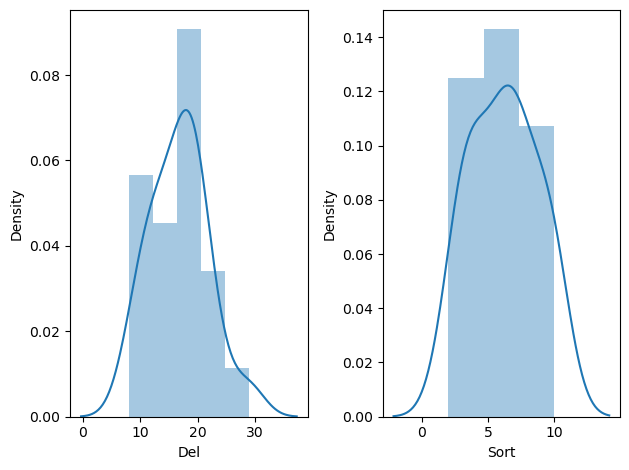

In [176]:
plt.subplot(1,2,1)
sns.distplot(df['Del'])

plt.subplot(1,2,2)
sns.distplot(df['Sort'])

plt.tight_layout()

In [177]:
df['Del'].skew()


0.3523900822831107

In [178]:
df['Sort'].skew()

0.047115474210530174

In [179]:
# Log Transformation


In [180]:
np.log(df['Del'])

0     3.044522
1     2.602690
2     2.983153
3     3.178054
4     3.367296
5     2.731115
6     2.944439
7     2.251292
8     2.884801
9     2.931194
10    2.987196
11    2.374906
12    2.814210
13    2.442347
14    2.487404
15    2.700018
16    2.621039
17    2.896464
18    2.079442
19    2.880882
20    3.068053
Name: Del, dtype: float64

In [181]:
df['Log_Del'] = np.log(df['Del'])
df.head()

,Del,Sort,Log_Del
0,21.00,10,3.044522
1,13.50,4,2.602690
2,19.75,6,2.983153
3,24.00,9,3.178054
4,29.00,10,3.367296


In [182]:
df['Log_Sort'] = np.log(df['Sort'])
df.head()

,Del,Sort,Log_Del,Log_Sort
0,21.00,10,3.044522,2.302585
1,13.50,4,2.602690,1.386294
2,19.75,6,2.983153,1.791759
3,24.00,9,3.178054,2.197225
4,29.00,10,3.367296,2.302585


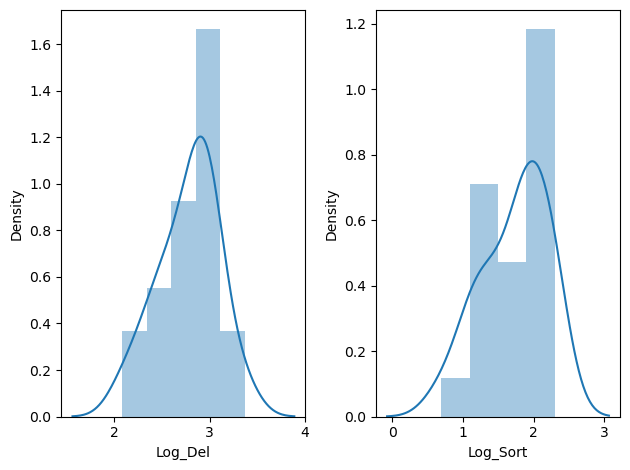

In [183]:
plt.subplot(1,2,1)
sns.distplot(df['Log_Del'])

plt.subplot(1,2,2)
sns.distplot(df['Log_Sort'])

plt.tight_layout()

In [184]:
# Sqrt transformation

In [185]:
df['sqrt_Del'] = np.sqrt(df['Del'])
df['sqrt_Sort'] = np.sqrt(df['Sort'])
df.head()

,Del,Sort,Log_Del,Log_Sort,sqrt_Del,sqrt_Sort
0,21.00,10,3.044522,2.302585,4.582576,3.162278
1,13.50,4,2.602690,1.386294,3.674235,2.000000
2,19.75,6,2.983153,1.791759,4.444097,2.449490
3,24.00,9,3.178054,2.197225,4.898979,3.000000
4,29.00,10,3.367296,2.302585,5.385165,3.162278


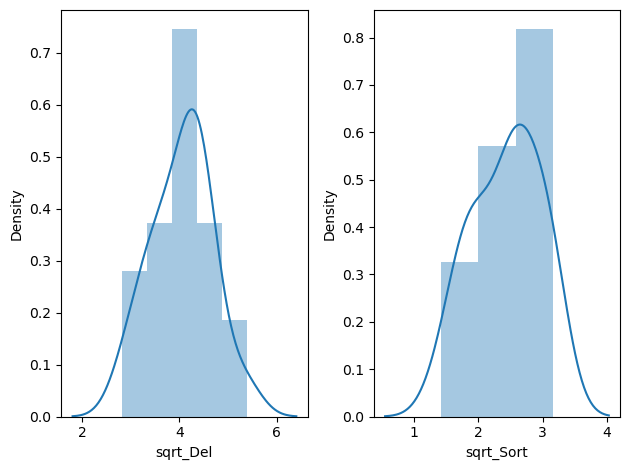

In [186]:
plt.subplot(1,2,1)
sns.distplot(df['sqrt_Del'])

plt.subplot(1,2,2)
sns.distplot(df['sqrt_Sort'])

plt.tight_layout()

In [187]:
df['sqrt_Del'].skew()


-0.0618105135865213

In [188]:
df['sqrt_Sort'].skew()

-0.25981634723613994

In [189]:
# Square Transformation
df['sqr_Del'] = (df['Del']*df['Del'])
df['sqr_Sort']= (df['Sort']*df['Sort'])
df.head()

,Del,Sort,Log_Del,Log_Sort,sqrt_Del,sqrt_Sort,sqr_Del,sqr_Sort
0,21.00,10,3.044522,2.302585,4.582576,3.162278,441.0000,100
1,13.50,4,2.602690,1.386294,3.674235,2.000000,182.2500,16
2,19.75,6,2.983153,1.791759,4.444097,2.449490,390.0625,36
3,24.00,9,3.178054,2.197225,4.898979,3.000000,576.0000,81
4,29.00,10,3.367296,2.302585,5.385165,3.162278,841.0000,100


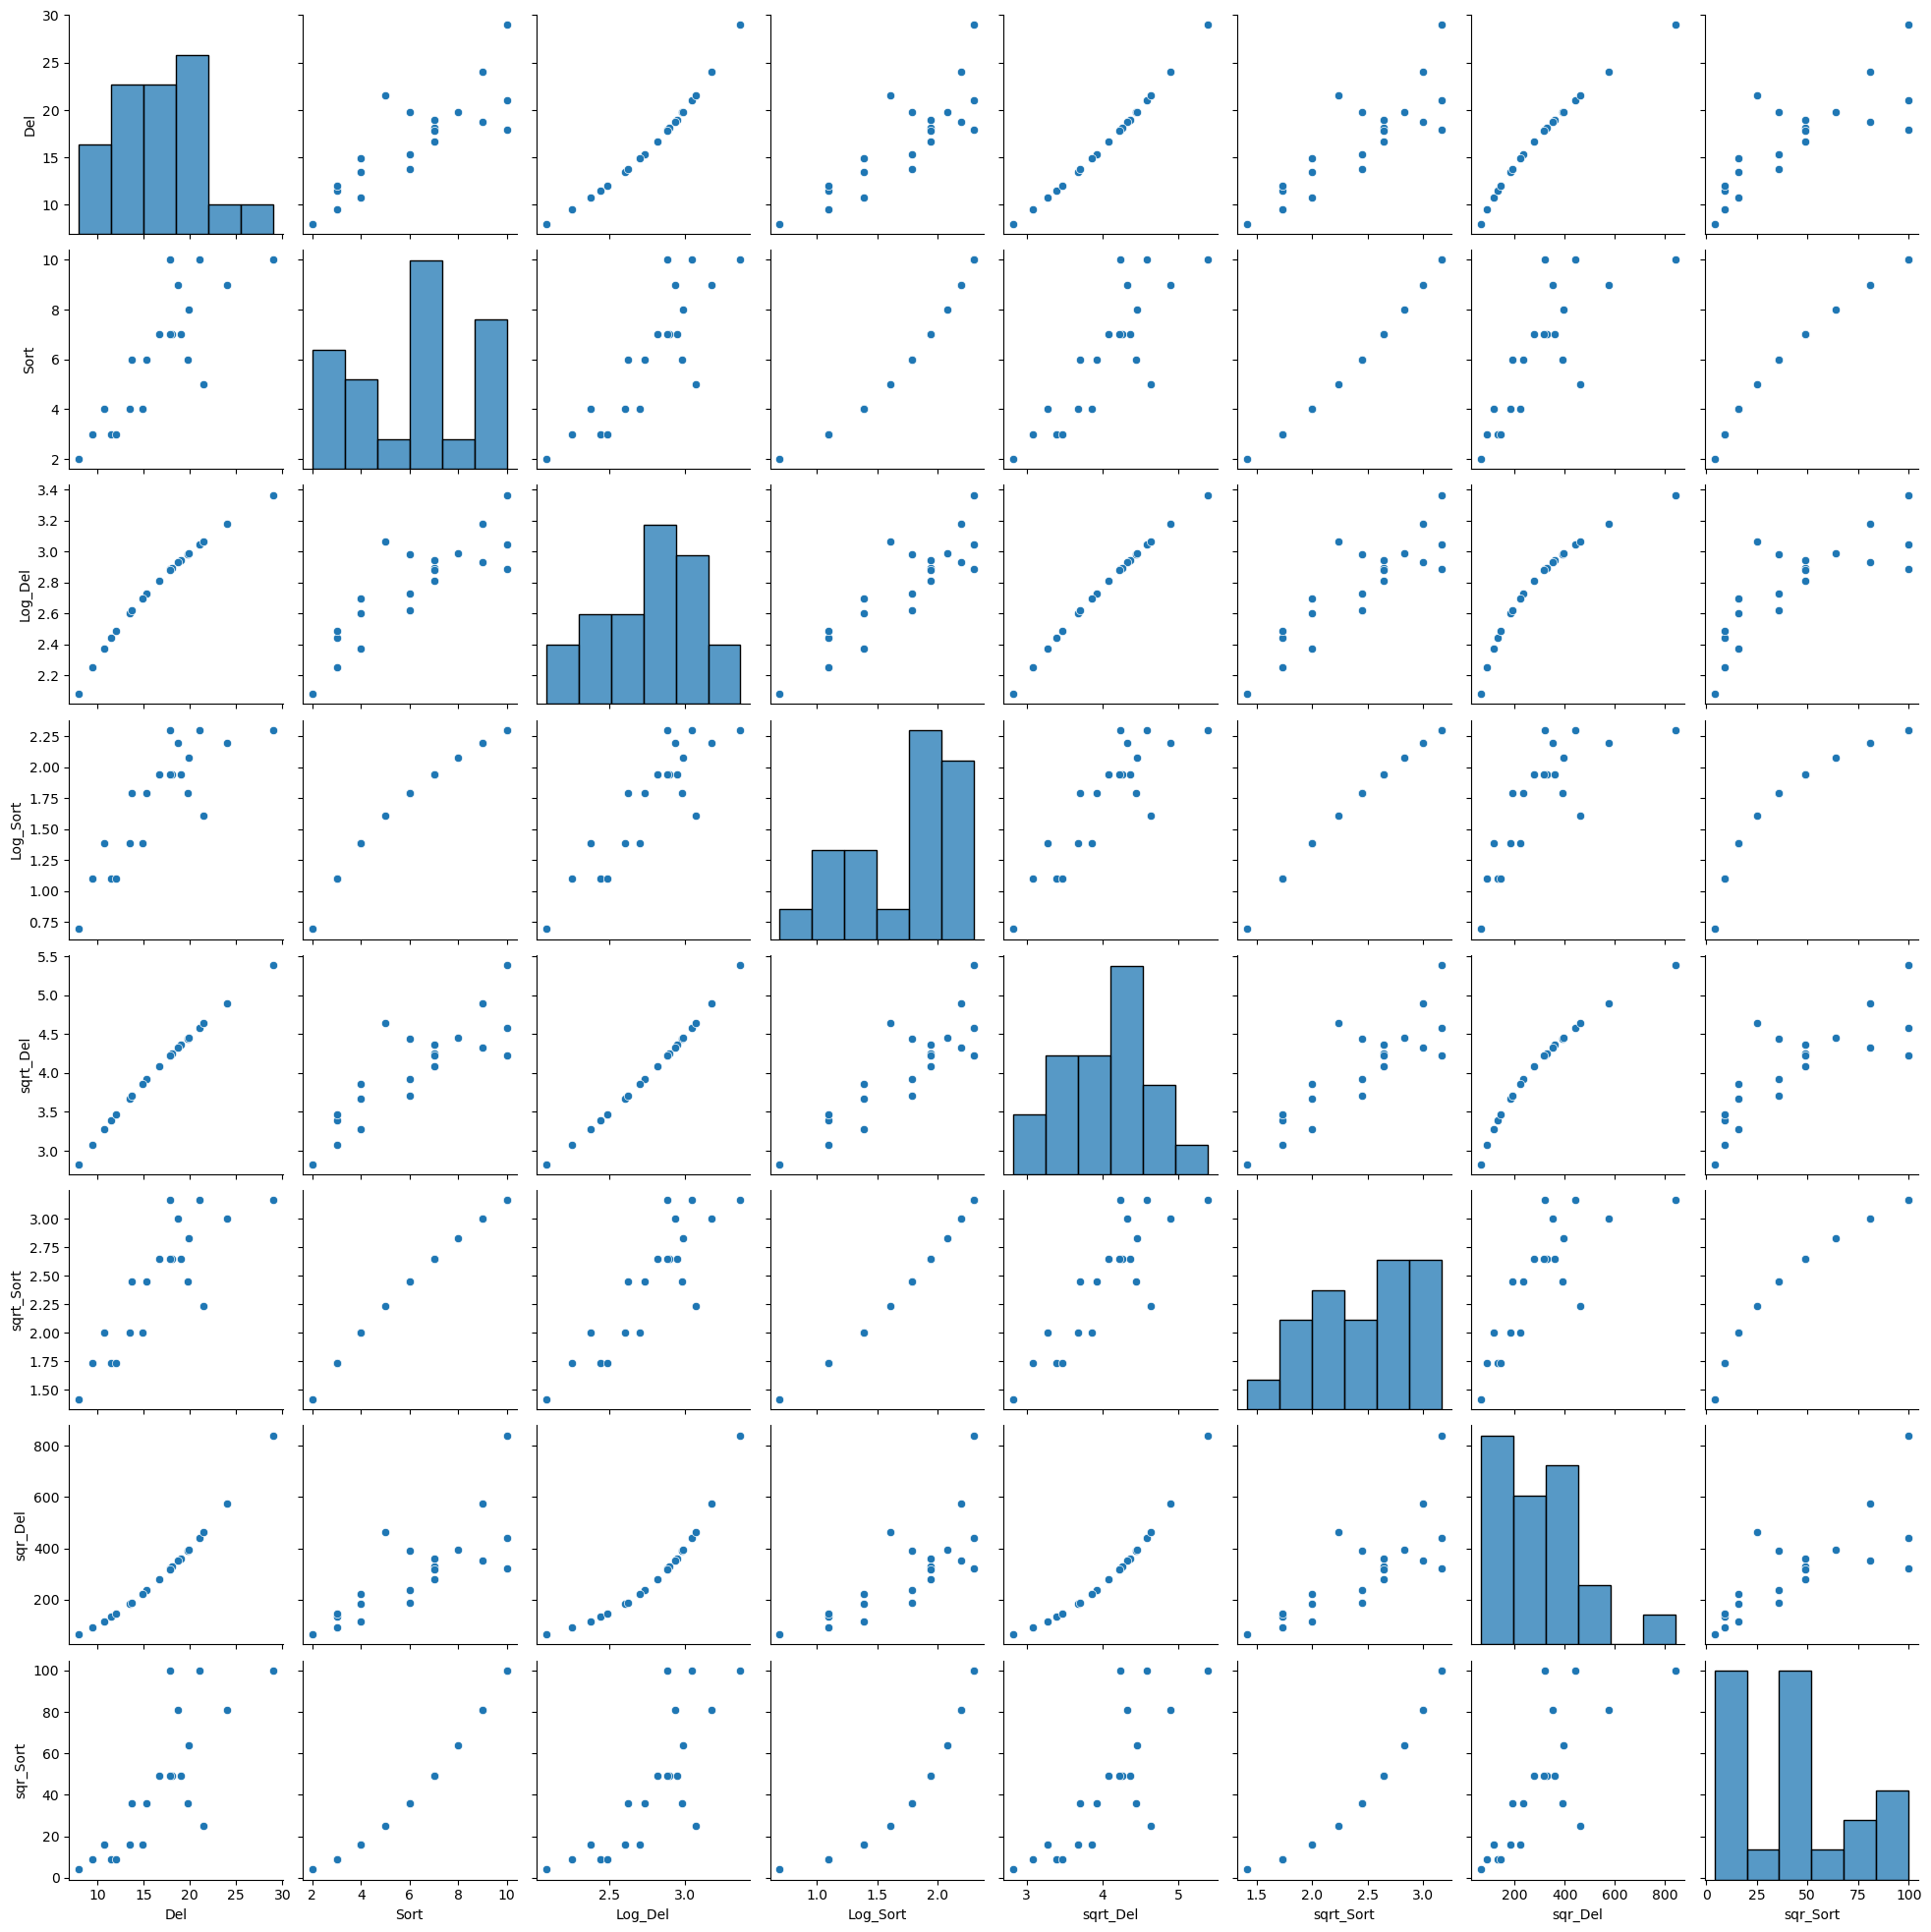

In [190]:
sns.pairplot(df)

In [191]:
# Exponential model 
exp_model= smf.ols('Log_Del~Sort', data=df).fit()
exp_model

In [192]:
exp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Log_Del   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           1.59e-06
Time:                        14:46:08   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
Sort           0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [193]:
exp_model.rsquared,exp_model.rsquared_adj

(0.7109478980584187, 0.6957346295351776)

In [194]:
exp_pred_log = exp_model.predict(pd.DataFrame(df['Sort']))
exp_pred_log

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [195]:
# Quadratic Model 
quad_model= smf.ols("Del~Sort+sqr_Sort", data=df).fit()
quad_model

In [196]:
quad_model.params

Intercept    3.522234
Sort         2.813002
sqr_Sort    -0.093198
dtype: float64

In [197]:
quad_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Del   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     20.36
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           2.39e-05
Time:                        14:46:16   Log-Likelihood:                -50.981
No. Observations:                  21   AIC:                             108.0
Df Residuals:                      18   BIC:                             111.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5222      4.160      0.847      0.408      -5.217      12.261
Sort           2.8130      1.461      1.926      0.070      -0.256       5.882
sqr_Sort      -0.0932      0.115     -0.810      0.429      -0.335       0.149
==============================================================================
Omnibus:                        5.388   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.393
Skew:                           0.943   Prob(JB):                        0.183
Kurtosis:                       3.563   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [198]:
quad_model.rsquared,quad_model.rsquared_adj

(0.6934396274520247, 0.659377363835583)

In [199]:
quad_model.predict(df[['Sort','sqr_Sort']])

0     22.332430
1     13.283069
2     17.045108
3     21.290194
4     22.332430
5     17.045108
6     18.646533
7     11.122455
8     22.332430
9     21.290194
10    20.061562
11    13.283069
12    18.646533
13    11.122455
14    11.122455
15    13.283069
16    17.045108
17    18.646533
18     8.775444
19    18.646533
20    15.257287
dtype: float64

In [200]:
# Squar-root model 
sqrt_model = smf.ols("sqrt_Del~Sort", data= df).fit()
sqrt_model

In [201]:
sqrt_model.params

Intercept    2.772731
Sort         0.206632
dtype: float64

In [202]:
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               sqrt_Del   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     45.20
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           2.00e-06
Time:                        14:46:23   Log-Likelihood:                -6.6646
No. Observations:                  21   AIC:                             17.33
Df Residuals:                      19   BIC:                             19.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7727      0.205     13.527      0.000       2.344       3.202
Sort           0.2066      0.031      6.723      0.000       0.142       0.271
==============================================================================
Omnibus:                        2.228   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.195
Skew:                           0.580   Prob(JB):                        0.550
Kurtosis:                       3.142   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [203]:
sqrt_model.rsquared, sqrt_model.rsquared_adj

(0.704049871541756, 0.6884735489913221)

In [204]:
sqrt_model.predict(df['Sort'])

0     4.839049
1     3.599258
2     4.012522
3     4.632417
4     4.839049
5     4.012522
6     4.219154
7     3.392626
8     4.839049
9     4.632417
10    4.425786
11    3.599258
12    4.219154
13    3.392626
14    3.392626
15    3.599258
16    4.012522
17    4.219154
18    3.185995
19    4.219154
20    3.805890
dtype: float64

# Salary Data 

In [205]:
sal=pd.read_csv('Salary_Data.csv')
sal

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [206]:
sal.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [207]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


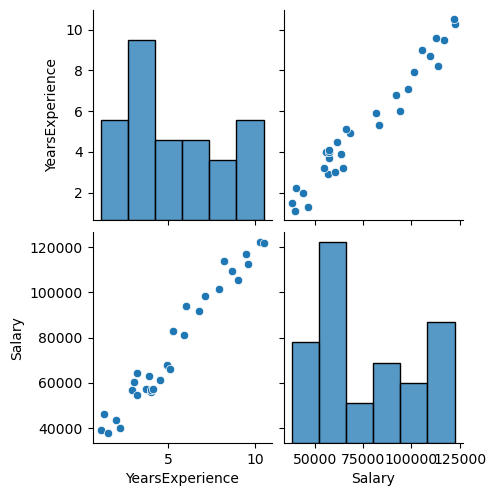

In [208]:
sns.pairplot(sal);

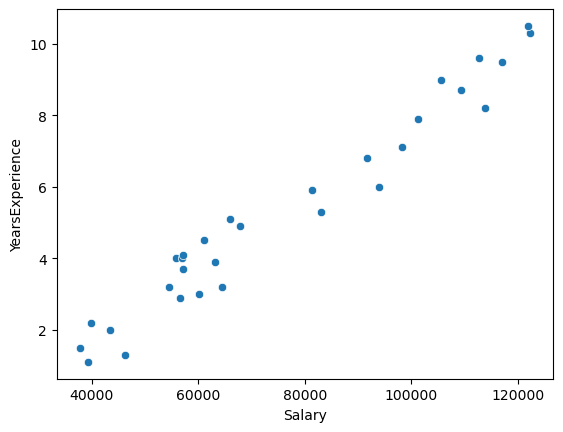

In [209]:
sns.scatterplot(x=sal['Salary'],y=sal['YearsExperience']);

<Axes: xlabel='Salary', ylabel='Density'>

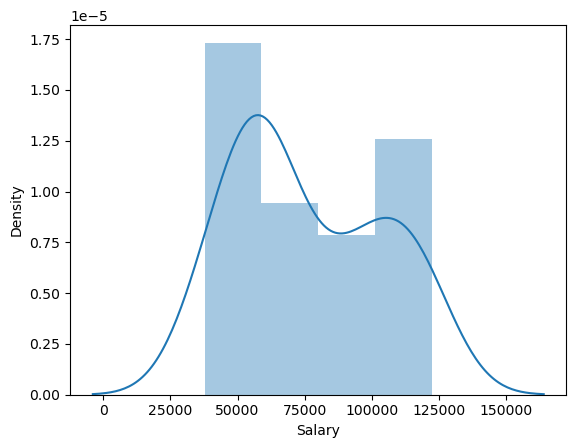

In [212]:
sns.distplot(sal['Salary'])

<Axes: xlabel='YearsExperience', ylabel='Density'>

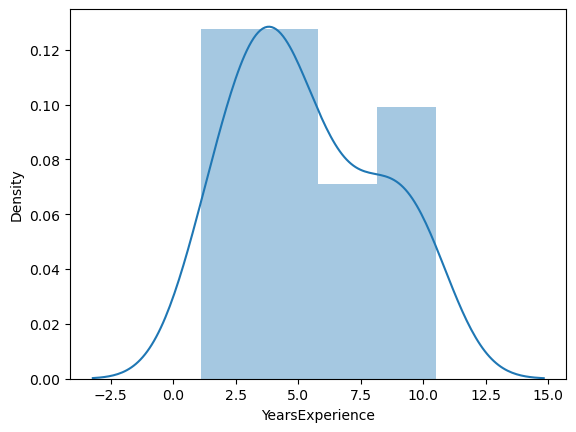

In [213]:
sns.distplot(sal['YearsExperience'])

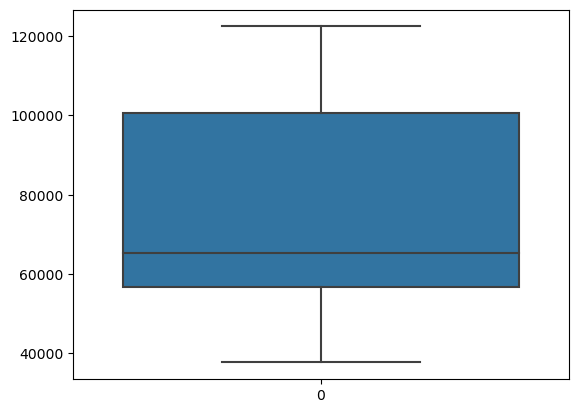

In [214]:
sns.boxplot(sal['Salary']);

In [215]:
Mod=smf.ols('Salary~YearsExperience',data=sal).fit()
Mod

In [216]:
Mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           1.14e-20
Time:                        14:47:31   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [217]:
Mod.rsquared, Mod.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

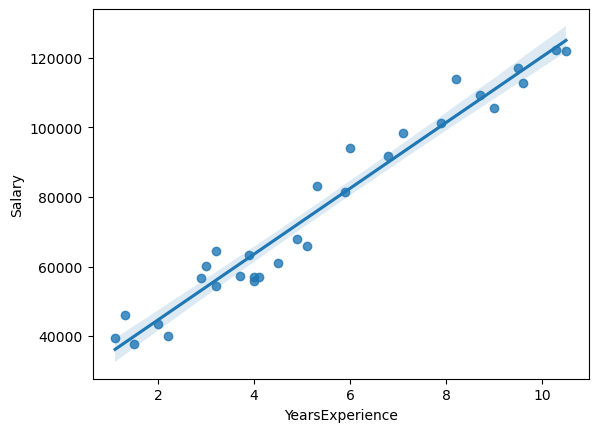

In [218]:
sns.regplot(x='YearsExperience',y='Salary',data=sal);

In [219]:
Mod.predict(sal)

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64